# Scikit
# LINEAR REGRESSION - CLOSED FORM
# a.k.a. the Normal Equation

references
* Hands-On Machine learning with Scikit-Learn & TensorFlow (O'Reilly, Geron) page 109
* matrix inverse explaination at https://www.mathsisfun.com/algebra/matrix-inverse.html

### time complexity...

* complexity due to feature count:
  * Normal Equation computes the inverse [xT * X] which is NxN. It is typically O(N^2.4) to O(N^3).
  * So if you double the features you 8* the time
* complexity due to sample count:
  * Normal Equation is ***LINEAR*** in sample count O(M) where M is number of samples 

In [18]:
import os
import tarfile
import urllib
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import category_encoders as category_encoders

from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR



In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

In [26]:
# Generate linear-looking data...

# see page 109

# Linear Regression Model:
#   y = thetaT * X
#   where:
#   theta is the model's parameter vector of size N containing:
#     theta_0 is the bias term
#     theta_1 .. theta_N are the feature weights
#   x is the feature vector of size [samples, features+1]
#     x0 always equal to "1" <----------
#     x1 to xN are the attributes - in this example there's only one attribute X1

SAMPLES = 100
x0 = np.ones(SAMPLES)
x1 = np.random.rand(SAMPLES) * 2  # uniform distribution
x = np.c_[x0, x1]

BIAS = 4
WEIGHT_1 = 3
y = BIAS + WEIGHT_1 * x1 + np.random.randn(SAMPLES)  # function + normal distribution


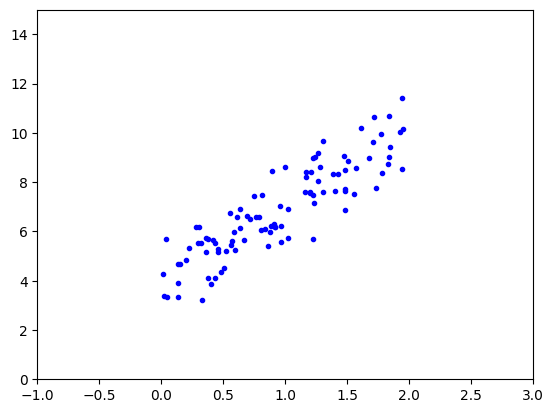

In [21]:
plt.plot(x1, y, 'b.')
plt.axis([-1, 3, 0, 15])
plt.show()

In [27]:
theta = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
theta
# theta is estimate of [BIAS, WEIGHT_1], approximating above

array([4.00144359, 2.99805664])

In [28]:
# make predictions using theta...
x_predict_0 = np.array([1, 1])
x_predict_1 = np.array([-0.5, 2.5])
x_predict = np.c_[x_predict_0, x_predict_1]

In [29]:
y_predict = x_predict.dot(theta)
y_predict

array([ 2.50241526, 11.4965852 ])

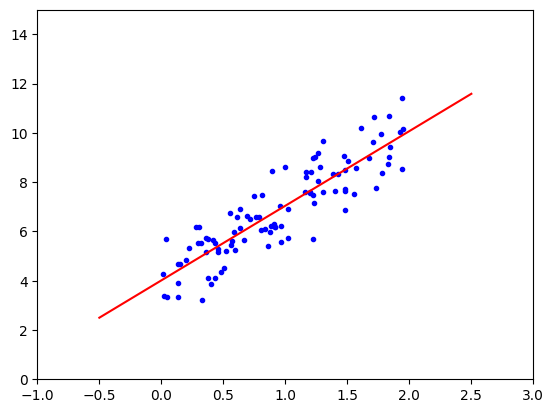

In [25]:
plt.plot(x1, y, 'b.')
plt.plot(x_predict_1, y_predict, 'r-')
plt.axis([-1, 3, 0, 15])
plt.show()